In [1]:
###DATASET #1
###creating database and table in mysql for graduate-employment-survey-ntu-nus-sit-smu-sutd.csv

import mysql.connector,sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


user,pw,host = 'root', 'password','127.0.0.1'
cnx=mysql.connector.connect(user=user, password=pw, host=host, use_pure=True)

mycursor=cnx.cursor()

try:
    mycursor.execute("CREATE DATABASE mydatabase") #creating database named mydatabase
    print("Database created!")
except:
    print("Unexpected error:", sys.exc_info()[0])
    exit()
    
# mycursor.execute("SHOW DATABASES") 
# for db in mycursor: #to check your databases
#     print(db)

try:
    mycursor.execute('USE mydatabase') #creating table named employment_survey
    mycursor.execute("""CREATE TABLE employment_survey
    (year int(255) NOT NULL,
    university varchar(255) NOT NULL,
    school varchar(255) NOT NULL,
    degree varchar(255) NOT NULL,
    employment_rate_overall int(255) NOT NULL,
    basic_monthly_mean int(255) NOT NULL,
    basic_monthly_median int(255) NOT NULL,
    gross_monthly_mean int(255) NOT NULL,
    gross_monthly_median int(255) NOT NULL,
    gross_mthly_25_percentile int(255) NOT NULL,
    gross_mthly_75_percentile int(255) NOT NULL
    )""")
    

    print("Table created!")
except:
    print("Unexpected error:", sys.exc_info()[0])
    exit()

# mycursor.execute("SHOW TABLES") 
# for tb in mycursor: #to check your tables
#     print(tb)

df= pd.read_csv("graduate-employment-survey-ntu-nus-sit-smu-sutd.csv") 
df2=df.replace('na', np.nan)
df3=df2.dropna()

for index, col in df3.iterrows():
   
    data = {
       'year': col[0],
       'university': col[1],
       'school': col[2],
       'degree': col[3],
       'employment_rate_overall': col[4],
       'basic_monthly_mean': col[5],
        'basic_monthly_median': col[6],
        'gross_monthly_mean': col[7],
        'gross_monthly_median': col[8],
        'gross_mthly_25_percentile': col[9],
        'gross_mthly_75_percentile': col[10],
     }
    

    
    
    query = insert_stmt = ("INSERT INTO employment_survey (year, university, school,degree,employment_rate_overall,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile)" 
                           "VALUES (%(year)s, %(university)s,%(school)s,%(degree)s,%(employment_rate_overall)s,%(basic_monthly_mean)s,%(basic_monthly_median)s,%(gross_monthly_mean)s,%(gross_monthly_median)s,%(gross_mthly_25_percentile)s,%(gross_mthly_75_percentile)s)")
    
    mycursor.execute(query, data) # Insert new employment_survey
    print("Adding row " + str(index))
    cnx.commit() # Make sure data is committed to the database
print("All data inserted!")

Unexpected error: <class 'mysql.connector.errors.DatabaseError'>
Unexpected error: <class 'mysql.connector.errors.ProgrammingError'>
Adding row 0
Adding row 1
Adding row 2
Adding row 3
Adding row 4
Adding row 5
Adding row 6
Adding row 7
Adding row 8
Adding row 9
Adding row 10
Adding row 11
Adding row 12
Adding row 13
Adding row 14
Adding row 15
Adding row 16
Adding row 17
Adding row 18
Adding row 19
Adding row 20
Adding row 21
Adding row 22
Adding row 23
Adding row 25
Adding row 26
Adding row 27
Adding row 29
Adding row 30
Adding row 31
Adding row 32
Adding row 33
Adding row 34
Adding row 35
Adding row 36
Adding row 37
Adding row 38
Adding row 39
Adding row 40
Adding row 41
Adding row 44
Adding row 45
Adding row 46
Adding row 47
Adding row 49
Adding row 50
Adding row 51
Adding row 52
Adding row 53
Adding row 54
Adding row 55
Adding row 56
Adding row 57
Adding row 58
Adding row 59
Adding row 60
Adding row 61
Adding row 62
Adding row 63
Adding row 64
Adding row 65
Adding row 68
Adding ro

This is the shape of the dataset
(504, 11)

This is the index of the dataset
RangeIndex(start=0, stop=504, step=1)

These are the columns in the dataset
Index(['year', 'university', 'school', 'degree', 'employment_rate_overall',
       'basic_monthly_mean', 'basic_monthly_median', 'gross_monthly_mean',
       'gross_monthly_median', 'gross_mthly_25_percentile',
       'gross_mthly_75_percentile'],
      dtype='object')

The total number of non-NA values in this dataset is:
year                         504
university                   504
school                       504
degree                       504
employment_rate_overall      504
basic_monthly_mean           504
basic_monthly_median         504
gross_monthly_mean           504
gross_monthly_median         504
gross_mthly_25_percentile    504
gross_mthly_75_percentile    504
dtype: int64

The summary of this dataset is shown below:
year                          int64
university                   object
school                       

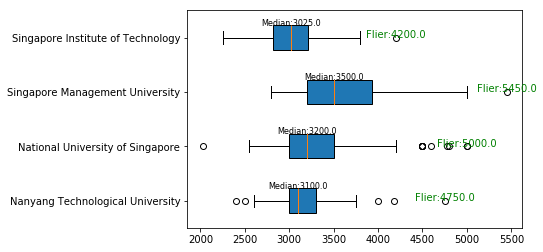

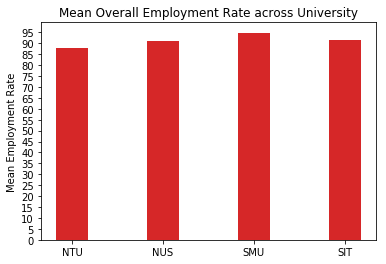

In [10]:
###DATASET #1
###import data from database to panda for graduate-employment-survey-ntu-nus-sit-smu-sutd.csv
import mysql.connector,sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


user,pw,host = 'root', 'password','127.0.0.1'
cnx=mysql.connector.connect(user=user, password=pw, host=host, database='mydatabase', use_pure=True)

mycursor=cnx.cursor()

mydf=pd.read_sql("select * from mydatabase.employment_survey",cnx)
#print(mydf)

mycursor.close()
cnx.close()

### to use panda to find correlation for boxplot with gross monthly mean between diff schools over the years
##1. Text based analysis using pandas
print("This is the shape of the dataset")
print(mydf.shape)
print()
print("This is the index of the dataset")
print(mydf.index)
print()
print("These are the columns in the dataset")
print(mydf.columns)
print()
print("The total number of non-NA values in this dataset is:")
print(mydf.notnull().sum())
print()
print("The summary of this dataset is shown below:")
print(mydf.dtypes)
print()
print("A descriptive statistical summary of this dataset is shown below")
print(mydf[['gross_monthly_mean']].describe())


##2. Build a boxplot across diff schools
labels=mydf.university.unique()
#print(labels)

#for NTU gross monthly mean data
NTU_data=(mydf[mydf.university == 'Nanyang Technological University']).gross_monthly_mean


#for NUS gross monthly mean data
NUS_data=(mydf[mydf.university == 'National University of Singapore']).gross_monthly_mean


#for NTU gross monthly mean data
SMU_data=(mydf[mydf.university == 'Singapore Management University']).gross_monthly_mean


#for NTU gross monthly mean data
SIT_data=(mydf[mydf.university == 'Singapore Institute of Technology']).gross_monthly_mean

data=(NTU_data,NUS_data,SMU_data,SIT_data)
#print(data)

bplot = plt.boxplot(data,labels=labels, patch_artist=True, vert=False)

for line in bplot['medians']:
    #print(line)
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    plt.text(x, y, 'Median:{:.1f}'.format(x),
         horizontalalignment='center',fontsize=8) # draw above, centered

fliers = []
for line in bplot['fliers']:
    ndarray = line.get_xydata()
    #print(ndarray)
    if (len(ndarray)>0):
        max_flier = ndarray[:,0].max()
        max_flier_index = ndarray[:,0].argmax()
        x = ndarray[max_flier_index,0] #where to plot the flier text in x position
        y = ndarray[max_flier_index,1] #where to plot the flier text in y position
        #print("Flier: " + str(x) + "," + str(max_flier))
      
    plt.text(x,y,'Flier:{:.1f}'.format(max_flier),horizontalalignment='center',fontsize=10,color='green') 

plt.show()	

##3. Build a barchart to show overall employment rate across schools
#for NTU gross monthly mean data
NTU_employment_rates=(mydf[mydf.university == 'Nanyang Technological University']).employment_rate_overall
NTU_data2=NTU_employment_rates.mean()

#for NUS gross monthly mean data
NUS_employment_rates=(mydf[mydf.university == 'National University of Singapore']).employment_rate_overall
NUS_data2=NUS_employment_rates.mean()

#for NTU gross monthly mean data
SMU_employment_rates=(mydf[mydf.university == 'Singapore Management University']).employment_rate_overall
SMU_data2=SMU_employment_rates.mean()

#for NTU gross monthly mean data
SIT_employment_rates=(mydf[mydf.university == 'Singapore Institute of Technology']).employment_rate_overall
SIT_data2=SIT_employment_rates.mean()


schools = np.arange(4)
mean_data = (NTU_data2, NUS_data2, SMU_data2, SIT_data2)
width = 0.35
p1t = plt.bar(schools, mean_data, width, color='#d62728')

plt.ylabel('Mean Employment Rate')
plt.title('Mean Overall Employment Rate across University')
plt.xticks(schools, ('NTU', 'NUS', 'SMU', 'SIT'))
plt.yticks(np.arange(0, 100, 5))

plt.show()


In [1]:
###DATASET #2
###creating database and table in mysql for resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv

import mysql.connector,sys
import pandas as pd
import matplotlib.pyplot as plt


user,pw,host = 'root', 'password','127.0.0.1'
cnx=mysql.connector.connect(user=user, password=pw, host=host, use_pure=True)

mycursor=cnx.cursor()

try:
    mycursor.execute("CREATE DATABASE mydatabase") #creating database named mydatabase
    print("Database created!")
except:
    print("Unexpected error:", sys.exc_info()[0])
    exit()
    
# mycursor.execute("SHOW DATABASES") 
# for db in mycursor: #to check your databases
#     print(db)

try:
    mycursor.execute('USE mydatabase') #creating table named resale_flat_prices
    mycursor.execute("""CREATE TABLE resale_flat_prices 
    (month varchar(255) NOT NULL,
    town varchar(255) NOT NULL,
    flat_type varchar(255) NOT NULL,
    block varchar(255) NOT NULL,
    street_name varchar(255) NOT NULL,
    storey_range varchar(255) NOT NULL,
    floor_area_sqm int(255) NOT NULL,
    flat_model varchar(255) NOT NULL,
    lease_commence_date varchar(255) NOT NULL,
    remaining_lease varchar(255) NOT NULL,
    resale_price int(255) NOT NULL
    )""")
    
    print("Table created!")
except:
    print("Unexpected error:", sys.exc_info()[0])
    exit()

# mycursor.execute("SHOW TABLES") 
# for tb in mycursor: #to check your tables
#     print(tb)

###import from csv to put into database
df = pd.read_csv("resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv") 


for index, col in df.iterrows():
   
    data = {
       'month': col[0],
       'town': col[1],
       'flat_type': col[2],
       'block': col[3],
       'street_name' : col[4],
       'storey_range': col[5],
        'floor_area_sqm': col[6],
        'flat_model': col[7],
        'lease_commence_date': col[8],
        'remaining_lease': col[9],
        'resale_price': col[10],
     }
    

    
    
    query = insert_stmt = ("INSERT INTO resale_flat_prices (month, town,  flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price)" 
                           "VALUES (%(month)s, %(town)s,%(flat_type)s,%(block)s,%(street_name)s,%(storey_range)s,%(floor_area_sqm)s,%(flat_model)s,%(lease_commence_date)s,%(remaining_lease)s,%(resale_price)s)")
    
    mycursor.execute(query, data) # Insert new resale_flat_prices
    print("Adding row " + str(index))
    cnx.commit() # Make sure data is committed to the database
print("All data inserted!")


Unexpected error: <class 'mysql.connector.errors.DatabaseError'>
Unexpected error: <class 'mysql.connector.errors.ProgrammingError'>
Adding row 0
Adding row 1
Adding row 2
Adding row 3
Adding row 4
Adding row 5
Adding row 6
Adding row 7
Adding row 8
Adding row 9
Adding row 10
Adding row 11
Adding row 12
Adding row 13
Adding row 14
Adding row 15
Adding row 16
Adding row 17
Adding row 18
Adding row 19
Adding row 20
Adding row 21
Adding row 22
Adding row 23
Adding row 24
Adding row 25
Adding row 26
Adding row 27
Adding row 28
Adding row 29
Adding row 30
Adding row 31
Adding row 32
Adding row 33
Adding row 34
Adding row 35
Adding row 36
Adding row 37
Adding row 38
Adding row 39
Adding row 40
Adding row 41
Adding row 42
Adding row 43
Adding row 44
Adding row 45
Adding row 46
Adding row 47
Adding row 48
Adding row 49
Adding row 50
Adding row 51
Adding row 52
Adding row 53
Adding row 54
Adding row 55
Adding row 56
Adding row 57
Adding row 58
Adding row 59
Adding row 60
Adding row 61
Adding ro

Adding row 1093
Adding row 1094
Adding row 1095
Adding row 1096
Adding row 1097
Adding row 1098
Adding row 1099
Adding row 1100
Adding row 1101
Adding row 1102
Adding row 1103
Adding row 1104
Adding row 1105
Adding row 1106
Adding row 1107
Adding row 1108
Adding row 1109
Adding row 1110
Adding row 1111
Adding row 1112
Adding row 1113
Adding row 1114
Adding row 1115
Adding row 1116
Adding row 1117
Adding row 1118
Adding row 1119
Adding row 1120
Adding row 1121
Adding row 1122
Adding row 1123
Adding row 1124
Adding row 1125
Adding row 1126
Adding row 1127
Adding row 1128
Adding row 1129
Adding row 1130
Adding row 1131
Adding row 1132
Adding row 1133
Adding row 1134
Adding row 1135
Adding row 1136
Adding row 1137
Adding row 1138
Adding row 1139
Adding row 1140
Adding row 1141
Adding row 1142
Adding row 1143
Adding row 1144
Adding row 1145
Adding row 1146
Adding row 1147
Adding row 1148
Adding row 1149
Adding row 1150
Adding row 1151
Adding row 1152
Adding row 1153
Adding row 1154
Adding r

Adding row 1619
Adding row 1620
Adding row 1621
Adding row 1622
Adding row 1623
Adding row 1624
Adding row 1625
Adding row 1626
Adding row 1627
Adding row 1628
Adding row 1629
Adding row 1630
Adding row 1631
Adding row 1632
Adding row 1633
Adding row 1634
Adding row 1635
Adding row 1636
Adding row 1637
Adding row 1638
Adding row 1639
Adding row 1640
Adding row 1641
Adding row 1642
Adding row 1643
Adding row 1644
Adding row 1645
Adding row 1646
Adding row 1647
Adding row 1648
Adding row 1649
Adding row 1650
Adding row 1651
Adding row 1652
Adding row 1653
Adding row 1654
Adding row 1655
Adding row 1656
Adding row 1657
Adding row 1658
Adding row 1659
Adding row 1660
Adding row 1661
Adding row 1662
Adding row 1663
Adding row 1664
Adding row 1665
Adding row 1666
Adding row 1667
Adding row 1668
Adding row 1669
Adding row 1670
Adding row 1671
Adding row 1672
Adding row 1673
Adding row 1674
Adding row 1675
Adding row 1676
Adding row 1677
Adding row 1678
Adding row 1679
Adding row 1680
Adding r

Adding row 2138
Adding row 2139
Adding row 2140
Adding row 2141
Adding row 2142
Adding row 2143
Adding row 2144
Adding row 2145
Adding row 2146
Adding row 2147
Adding row 2148
Adding row 2149
Adding row 2150
Adding row 2151
Adding row 2152
Adding row 2153
Adding row 2154
Adding row 2155
Adding row 2156
Adding row 2157
Adding row 2158
Adding row 2159
Adding row 2160
Adding row 2161
Adding row 2162
Adding row 2163
Adding row 2164
Adding row 2165
Adding row 2166
Adding row 2167
Adding row 2168
Adding row 2169
Adding row 2170
Adding row 2171
Adding row 2172
Adding row 2173
Adding row 2174
Adding row 2175
Adding row 2176
Adding row 2177
Adding row 2178
Adding row 2179
Adding row 2180
Adding row 2181
Adding row 2182
Adding row 2183
Adding row 2184
Adding row 2185
Adding row 2186
Adding row 2187
Adding row 2188
Adding row 2189
Adding row 2190
Adding row 2191
Adding row 2192
Adding row 2193
Adding row 2194
Adding row 2195
Adding row 2196
Adding row 2197
Adding row 2198
Adding row 2199
Adding r

Adding row 2655
Adding row 2656
Adding row 2657
Adding row 2658
Adding row 2659
Adding row 2660
Adding row 2661
Adding row 2662
Adding row 2663
Adding row 2664
Adding row 2665
Adding row 2666
Adding row 2667
Adding row 2668
Adding row 2669
Adding row 2670
Adding row 2671
Adding row 2672
Adding row 2673
Adding row 2674
Adding row 2675
Adding row 2676
Adding row 2677
Adding row 2678
Adding row 2679
Adding row 2680
Adding row 2681
Adding row 2682
Adding row 2683
Adding row 2684
Adding row 2685
Adding row 2686
Adding row 2687
Adding row 2688
Adding row 2689
Adding row 2690
Adding row 2691
Adding row 2692
Adding row 2693
Adding row 2694
Adding row 2695
Adding row 2696
Adding row 2697
Adding row 2698
Adding row 2699
Adding row 2700
Adding row 2701
Adding row 2702
Adding row 2703
Adding row 2704
Adding row 2705
Adding row 2706
Adding row 2707
Adding row 2708
Adding row 2709
Adding row 2710
Adding row 2711
Adding row 2712
Adding row 2713
Adding row 2714
Adding row 2715
Adding row 2716
Adding r

Adding row 3175
Adding row 3176
Adding row 3177
Adding row 3178
Adding row 3179
Adding row 3180
Adding row 3181
Adding row 3182
Adding row 3183
Adding row 3184
Adding row 3185
Adding row 3186
Adding row 3187
Adding row 3188
Adding row 3189
Adding row 3190
Adding row 3191
Adding row 3192
Adding row 3193
Adding row 3194
Adding row 3195
Adding row 3196
Adding row 3197
Adding row 3198
Adding row 3199
Adding row 3200
Adding row 3201
Adding row 3202
Adding row 3203
Adding row 3204
Adding row 3205
Adding row 3206
Adding row 3207
Adding row 3208
Adding row 3209
Adding row 3210
Adding row 3211
Adding row 3212
Adding row 3213
Adding row 3214
Adding row 3215
Adding row 3216
Adding row 3217
Adding row 3218
Adding row 3219
Adding row 3220
Adding row 3221
Adding row 3222
Adding row 3223
Adding row 3224
Adding row 3225
Adding row 3226
Adding row 3227
Adding row 3228
Adding row 3229
Adding row 3230
Adding row 3231
Adding row 3232
Adding row 3233
Adding row 3234
Adding row 3235
Adding row 3236
Adding r

Adding row 3704
Adding row 3705
Adding row 3706
Adding row 3707
Adding row 3708
Adding row 3709
Adding row 3710
Adding row 3711
Adding row 3712
Adding row 3713
Adding row 3714
Adding row 3715
Adding row 3716
Adding row 3717
Adding row 3718
Adding row 3719
Adding row 3720
Adding row 3721
Adding row 3722
Adding row 3723
Adding row 3724
Adding row 3725
Adding row 3726
Adding row 3727
Adding row 3728
Adding row 3729
Adding row 3730
Adding row 3731
Adding row 3732
Adding row 3733
Adding row 3734
Adding row 3735
Adding row 3736
Adding row 3737
Adding row 3738
Adding row 3739
Adding row 3740
Adding row 3741
Adding row 3742
Adding row 3743
Adding row 3744
Adding row 3745
Adding row 3746
Adding row 3747
Adding row 3748
Adding row 3749
Adding row 3750
Adding row 3751
Adding row 3752
Adding row 3753
Adding row 3754
Adding row 3755
Adding row 3756
Adding row 3757
Adding row 3758
Adding row 3759
Adding row 3760
Adding row 3761
Adding row 3762
Adding row 3763


ProgrammingError: 1049 (42000): Unknown database 'mydatabase'

This is the shape of the dataset
(52312, 11)

This is the index of the dataset
RangeIndex(start=0, stop=52312, step=1)

These are the columns in the dataset
Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

The total number of non-NA values in this dataset is:
month                  52312
town                   52312
flat_type              52312
block                  52312
street_name            52312
storey_range           52312
floor_area_sqm         52312
flat_model             52312
lease_commence_date    52312
remaining_lease        52312
resale_price           52312
dtype: int64

The summary of this dataset is shown below:
month                  object
town                   object
flat_type              object
block                  object
street_name            object
storey_range           object
floor_area_sqm          int

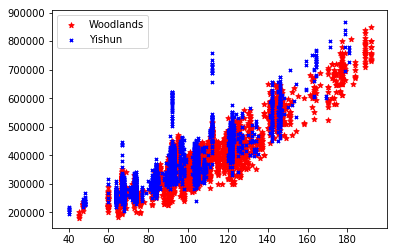

In [42]:
###DATASET #2
###import data from database to panda for resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv
import mysql.connector,sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


user,pw,host = 'root', 'password','127.0.0.1'
cnx=mysql.connector.connect(user=user, password=pw, host=host, database='mydatabase', use_pure=True)

mycursor=cnx.cursor()

mydf=pd.read_sql("select * from mydatabase.resale_flat_prices",cnx)
#print(mydf)

mycursor.close()
cnx.close()


### to use panda to find correlation btwn sqm and resale price for woodlands and yishun
##1. Text based analysis using pandas
print("This is the shape of the dataset")
print(mydf.shape)
print()
print("This is the index of the dataset")
print(mydf.index)
print()
print("These are the columns in the dataset")
print(mydf.columns)
print()
print("The total number of non-NA values in this dataset is:")
print(mydf.notnull().sum())
print()
print("The summary of this dataset is shown below:")
print(mydf.dtypes)
print()
print("A descriptive statistical summary of this dataset is shown below")
print(mydf[['resale_price']].describe())

##2. Plot scatter plot to find correlation
mydf_woodlands=mydf[mydf.town=='WOODLANDS']
x_sqm_woodlands=mydf_woodlands.floor_area_sqm
y_resale_price_woodlands=mydf_woodlands.resale_price

mydf_yishun=mydf[mydf.town=='YISHUN']
x_sqm_yishun=mydf_yishun.floor_area_sqm
y_resale_price_yishun=mydf_yishun.resale_price

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x_sqm_woodlands, y_resale_price_woodlands, s=30, c='red', marker="*", label='Woodlands')
ax1.scatter(x_sqm_yishun , y_resale_price_yishun , s=10, c='blue', marker="x", label='Yishun')

plt.legend(loc='upper left');

plt.show()

In [1]:
###DATASET #3
###creating database and table in mysql for employment-change-by-industry-level3.csv

import mysql.connector,sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


user,pw,host = 'root', 'password','127.0.0.1'
cnx=mysql.connector.connect(user=user, password=pw, host=host, use_pure=True)

mycursor=cnx.cursor()

try:
    mycursor.execute("CREATE DATABASE mydatabase") #creating database named mydatabase
    print("Database created!")
except:
    print("Unexpected error:", sys.exc_info()[0])
    exit()
    
# mycursor.execute("SHOW DATABASES") 
# for db in mycursor: #to check your databases
#     print(db)

try:
    mycursor.execute('USE mydatabase') #creating table named employment_change
    mycursor.execute("""CREATE TABLE employment_change_by_industry
    (year int(255) NOT NULL,
    industry1 varchar(255) NOT NULL,
    industry2 varchar(255) NOT NULL,
    industry3 varchar(255) NOT NULL,
    employment_change float(255) NOT NULL
    )""")
    
    print("Table created!")
except:
    print("Unexpected error:", sys.exc_info()[0])
    exit()

# mycursor.execute("SHOW TABLES") 
# for tb in mycursor: #to check your tables
#     print(tb)

###import from csv to put into database
df = pd.read_csv("employment-change-by-industry-level3.csv") 
df2=df.replace('-', np.nan)
df3=df2.dropna()

for index, col in df3.iterrows():
   
    data = {
       'year': col[0],
       'industry1': col[1],
       'industry2': col[2],
       'industry3': col[3],
       'employment_change' : col[4]
     }
    

    
    
    query = insert_stmt = ("INSERT INTO employment_change_by_industry (year, industry1,  industry2,industry3,employment_change)" 
                           "VALUES (%(year)s, %(industry1)s,%(industry2)s,%(industry3)s,%(employment_change)s)")
    
    mycursor.execute(query, data) # Insert new employment_change_by_industry
    print("Adding row " + str(index))
    cnx.commit() # Make sure data is committed to the database
print("All data inserted!")

Unexpected error: <class 'mysql.connector.errors.DatabaseError'>
Unexpected error: <class 'mysql.connector.errors.ProgrammingError'>
Adding row 0
Adding row 1
Adding row 2
Adding row 3
Adding row 4
Adding row 5
Adding row 6
Adding row 7
Adding row 8
Adding row 9
Adding row 10
Adding row 11
Adding row 12
Adding row 13
Adding row 14
Adding row 15
Adding row 16
Adding row 17
Adding row 18
Adding row 19
Adding row 20
Adding row 21
Adding row 22
Adding row 23
Adding row 24
Adding row 25
Adding row 26
Adding row 27
Adding row 28
Adding row 29
Adding row 30
Adding row 31
Adding row 32
Adding row 33
Adding row 34
Adding row 35
Adding row 36
Adding row 37
Adding row 38
Adding row 39
Adding row 40
Adding row 41
Adding row 42
Adding row 43
Adding row 44
Adding row 45
Adding row 46
Adding row 47
Adding row 48
Adding row 49
Adding row 50
Adding row 51
Adding row 52
Adding row 53
Adding row 54
Adding row 55
Adding row 56
Adding row 57
Adding row 58
Adding row 59
Adding row 60
Adding row 61
Adding ro

Adding row 550
Adding row 551
Adding row 552
Adding row 553
Adding row 554
Adding row 555
Adding row 556
Adding row 557
Adding row 558
Adding row 559
Adding row 560
Adding row 561
Adding row 562
Adding row 563
Adding row 564
Adding row 565
Adding row 566
Adding row 567
Adding row 568
Adding row 569
Adding row 570
Adding row 571
Adding row 572
Adding row 573
Adding row 574
Adding row 575
Adding row 576
Adding row 577
Adding row 578
Adding row 579
Adding row 580
Adding row 581
Adding row 582
Adding row 583
Adding row 584
Adding row 585
Adding row 586
Adding row 587
Adding row 588
Adding row 589
Adding row 590
Adding row 591
Adding row 592
Adding row 593
Adding row 594
Adding row 595
Adding row 596
Adding row 597
Adding row 598
Adding row 599
Adding row 600
Adding row 601
Adding row 602
Adding row 603
Adding row 604
Adding row 605
Adding row 606
Adding row 607
Adding row 608
Adding row 609
Adding row 610
Adding row 611
Adding row 612
Adding row 613
Adding row 614
Adding row 615
Adding row

This is the shape of the dataset
(899, 5)

This is the index of the dataset
RangeIndex(start=0, stop=899, step=1)

These are the columns in the dataset
Index(['year', 'industry1', 'industry2', 'industry3', 'employment_change'], dtype='object')

The total number of non-NA values in this dataset is:
year                 899
industry1            899
industry2            899
industry3            899
employment_change    899
dtype: int64

The summary of this dataset is shown below:
year                  int64
industry1            object
industry2            object
industry3            object
employment_change     int64
dtype: object

A descriptive statistical summary of this dataset is shown below
       employment_change
count         899.000000
mean            2.691880
std             6.779345
min           -38.000000
25%             0.000000
50%             1.000000
75%             5.000000
max            64.000000


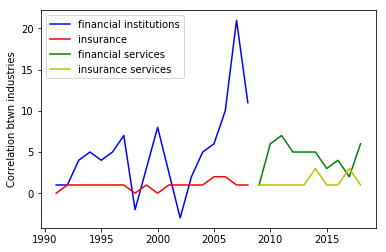

In [50]:
###DATASET #3
###import data from database to panda for employment-change-by-industry-level3.csv
import mysql.connector,sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


user,pw,host = 'root', 'password','127.0.0.1'
cnx=mysql.connector.connect(user=user, password=pw, host=host, database='mydatabase', use_pure=True)

mycursor=cnx.cursor()

mydf=pd.read_sql("select * from mydatabase.employment_change_by_industry",cnx)
#print(mydf)

mycursor.close()
cnx.close()


### to use panda to find correlation 
##1. Text based analysis using pandas
print("This is the shape of the dataset")
print(mydf.shape)
print()
print("This is the index of the dataset")
print(mydf.index)
print()
print("These are the columns in the dataset")
print(mydf.columns)
print()
print("The total number of non-NA values in this dataset is:")
print(mydf.notnull().sum())
print()
print("The summary of this dataset is shown below:")
print(mydf.dtypes)
print()
print("A descriptive statistical summary of this dataset is shown below")
print(mydf[['employment_change']].describe())

##2. Construct a correlation line over the years in between financial institutions, insurance, financial services
## and insurance services to find any correlation

# industries=mydf.industry3.unique()
# print(labels)

#data for financial institutions
df_financial_institutions=mydf[mydf.industry3=='financial institutions']
data1=df_financial_institutions.drop_duplicates(subset ="year", keep = 'first', inplace = False)
y_financial_institutions=data1.employment_change
x_financial_institutions=data1.year
#print(y_financial_institutions)

#data for insurance
df_insurance=mydf[mydf.industry3=='insurance']
data2=df_insurance.drop_duplicates(subset ="year", keep = 'first', inplace = False)
y_insurance=data2.employment_change
x_insurance=data2.year
#print(y_insurance)

#data for financial services
df_financial_services=mydf[mydf.industry3=='financial services']
data3=df_financial_services.drop_duplicates(subset ="year", keep = 'first', inplace = False)
y_financial_services=data3.employment_change
x_financial_services=data3.year
#print(y_financial_services)

#data for insurance services
df_insurance_services=mydf[mydf.industry3=='insurance services']
data4=df_insurance_services.drop_duplicates(subset ="year", keep = 'first', inplace = False)
y_insurance_services=data4.employment_change
x_insurance_services=data4.year
#print(y_insurance_services)

x_labels= mydf.year.drop_duplicates(keep='first', inplace= False)
#print(x_labels)


fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(x_financial_institutions, y_financial_institutions, c='b',  label='financial institutions')
ax1.plot(x_insurance,y_insurance, c='r', label='insurance')
ax1.plot(x_financial_services,y_financial_services, c='g', label='financial services')
ax1.plot(x_insurance_services,y_insurance_services, c='y', label='insurance services')
plt.ylabel('Correlation btwn industries')
plt.legend(loc='upper left');

plt.show()
